Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [3]:
import pandas as pd

data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
Q1: Examine the Variables
Descriptive Statistics
Let's start by examining some descriptive statistics to understand the distribution and basic characteristics of each variable. This includes measures like mean, median, standard deviation, min, and max.


In [11]:

# Descriptive statistics
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


C:\Users\vishn\AppData\Local\Temp\ipykernel_3752\1660260903.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


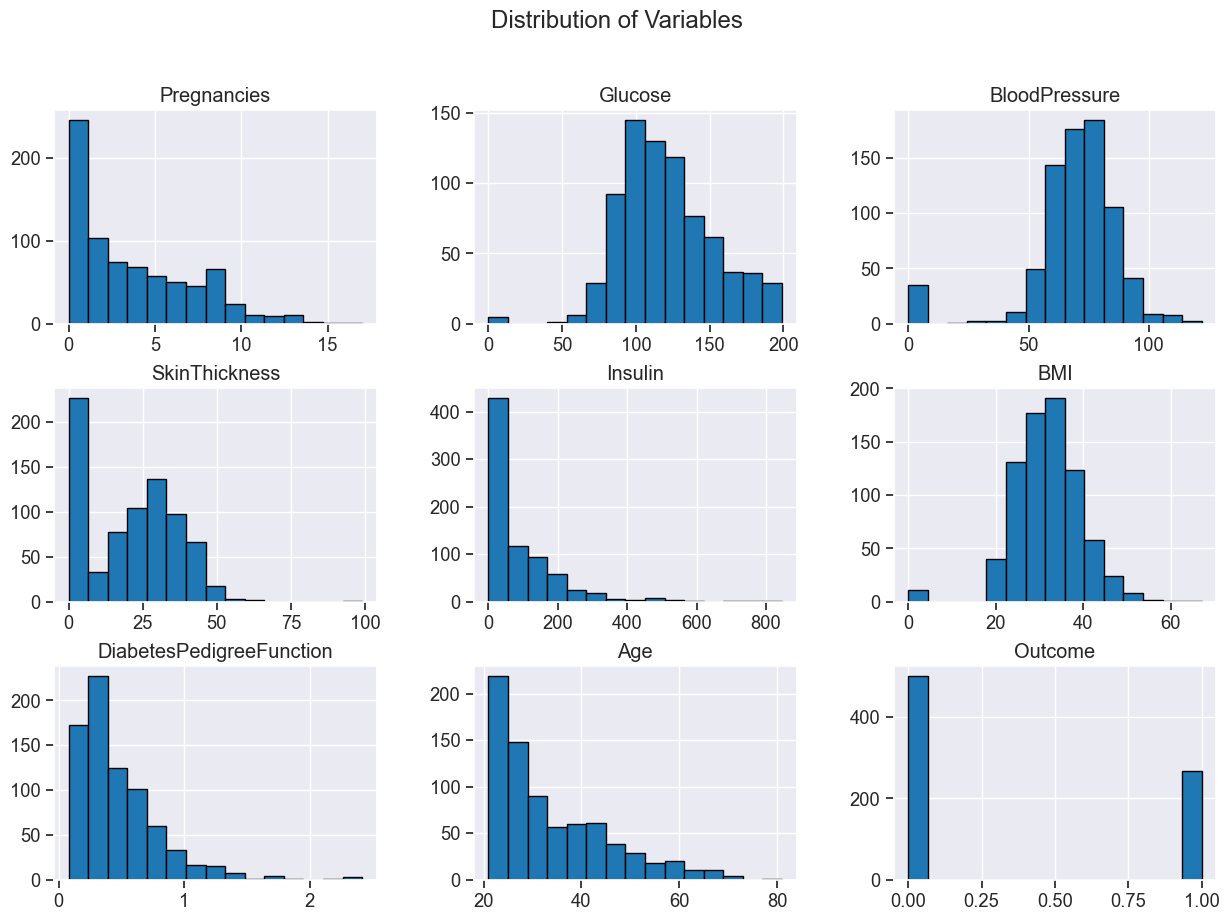

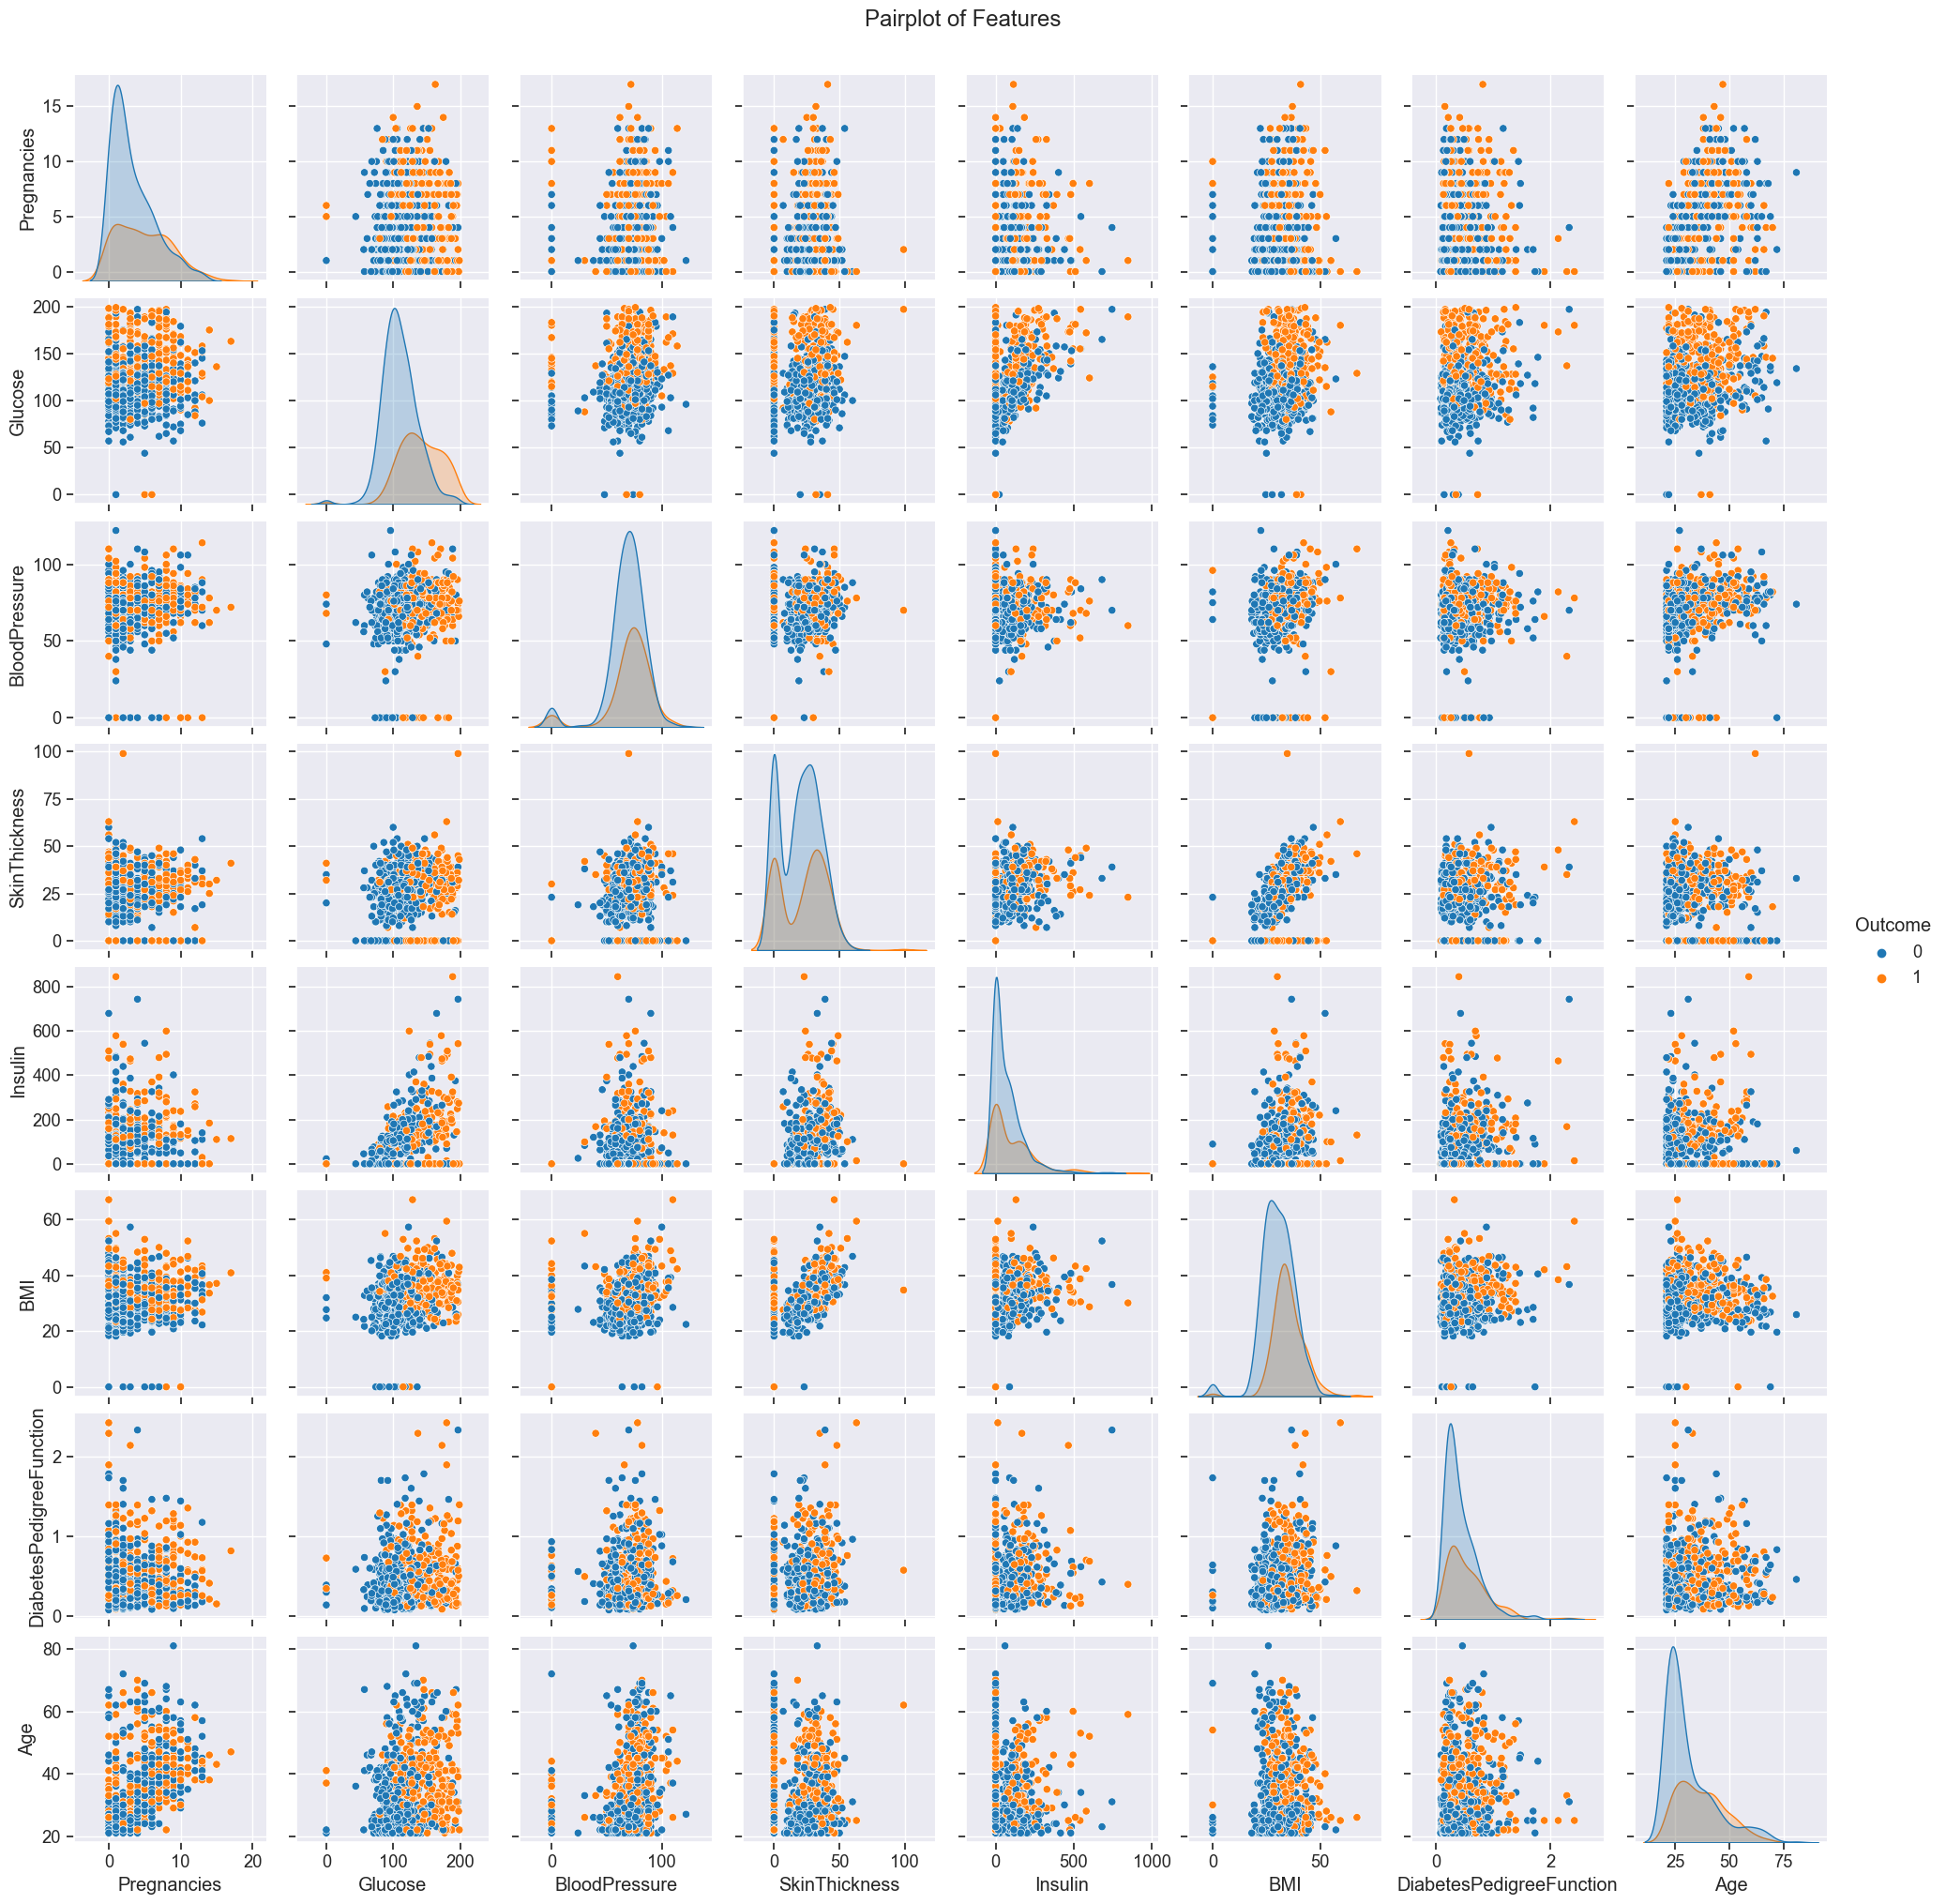

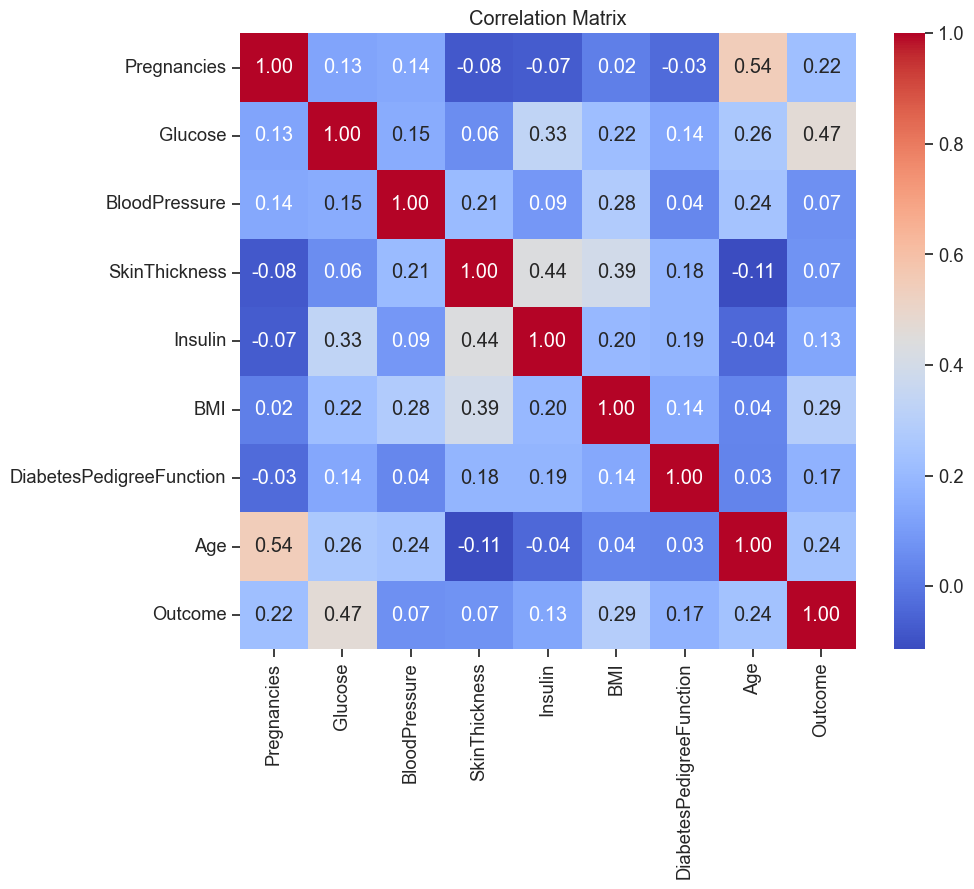

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
plt.style.use('seaborn-darkgrid')
sns.set_context("notebook", font_scale=1.2)

# Plot histograms for each feature
data.hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle('Distribution of Variables')
plt.show()

# Pairplot for relationships between variables
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Correlation matrix heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [ ]:
Handle Missing Values: Identify and address any missing values.
Remove Outliers: Detect and remove outliers that may skew the model.
Transform Categorical Variables: Convert categorical variables into numerical representations if necessary (although in this dataset, all are numeric)

In [17]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
print("Missing Values:\n", missing_values)

# Fill missing values with median (example strategy, modify as needed)
data.fillna(data.median(), inplace=True)


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [19]:
# Define a function to detect outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from specific columns
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data_cleaned = remove_outliers(data, columns_to_check)

# Display the shape before and after removing outliers
print("Original Shape:", data.shape)
print("Cleaned Shape:", data_cleaned.shape)


Original Shape: (768, 9)
Cleaned Shape: (636, 9)


In [ ]:
# Example: Transforming categorical variables (if any exist)
# data = pd.get_dummies(data, drop_first=True)

# Check the transformed dataset
# print(data.head())


In [21]:
import pandas as pd

# Load the dataset
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values with median
data.fillna(data.median(), inplace=True)

# Remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columns to check for outliers
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Remove outliers
data_cleaned = remove_outliers(data, columns_to_check)

# Display the shape before and after cleaning
print("Original Shape:", data.shape)
print("Cleaned Shape:", data_cleaned.shape)

# Print a summary of the cleaned data
print(data_cleaned.describe())


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Original Shape: (768, 9)
Cleaned Shape: (636, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   636.000000  636.000000     636.000000     636.000000  636.000000   
mean      3.786164  118.869497      72.007862      20.745283   69.017296   
std       3.251388   28.996773      11.301102      15.231688   83.601857   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  114.000000      72.000000      23.000000   42.500000   
75%       6.000000  136.250000      80.000000      32.000000  122.000000   
max      13.000000  198.000000     106.0000

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [ ]:
Load the Dataset: Import your data into your programming environment.
Set the Random Seed: To ensure that your splits are reproducible, you should set a random seed.
Split the Dataset: Use a function from a library to perform the split.

In [27]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

In [37]:

# Set the features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Set the random seed for reproducibility
random_seed = 42

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Check the shapes of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (614, 8)
Test set shape: (154, 8)


In [ ]:
Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Set up hyperparameter grid for cross-validation
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Train the best model on the entire training set
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score: 0.7411
Test set accuracy: 0.7597
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [ ]:
Steps:
Calculate Metrics: Compute accuracy, precision, recall, and F1 score.
Confusion Matrix: Display the confusion matrix to visualize the performance.
ROC Curve: Plot the ROC curve to evaluate the model's ability to distinguish between classes.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test) 

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7468
Precision: 0.7589
Recall: 0.7468
F1 Score: 0.7503


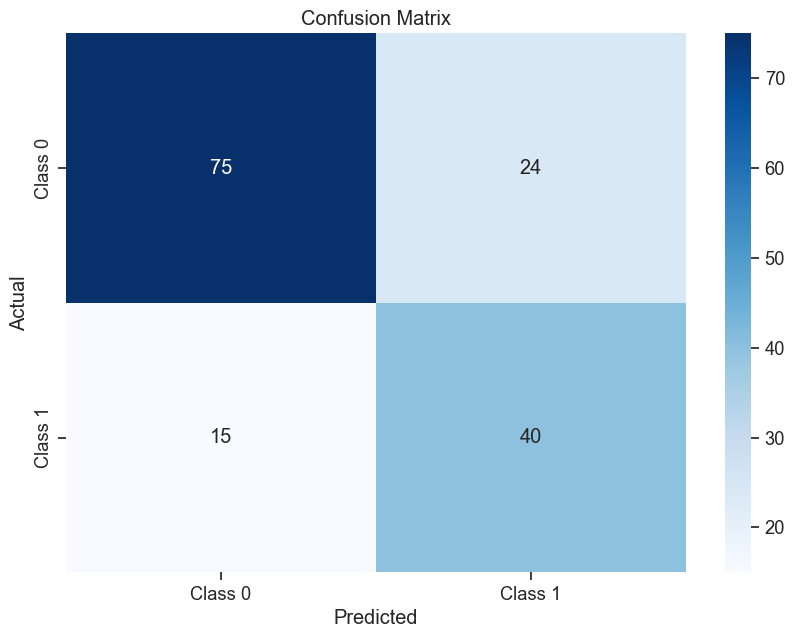

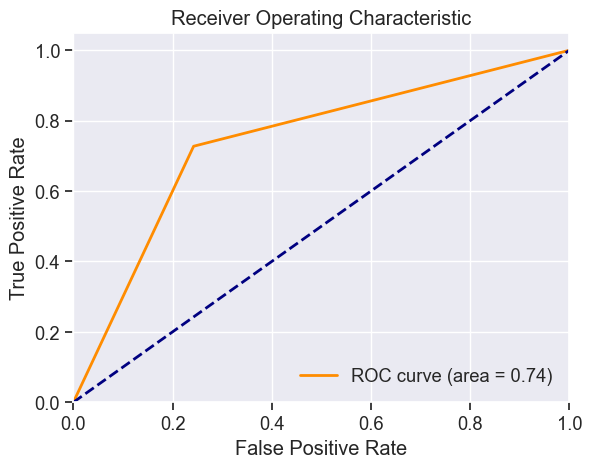

In [61]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
# Binarize the output if the task is multi-class classification
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_prob_bin = label_binarize(y_prob[:, 1], classes=[0, 1])

fpr, tpr, _ = roc_curve(y_test_bin, y_prob_bin)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Explanation:
Metrics Calculation:

Accuracy: Proportion of correctly classified samples.
Precision: Proportion of true positive predictions among all positive predictions.
Recall: Proportion of true positive predictions among all actual positives.
F1 Score: Harmonic mean of precision and recall.
Confusion Matrix:

Visualizes true positives, true negatives, false positives, and false negatives. It's useful for understanding the classification performance across different classes.
ROC Curve:

ROC Curve: Plots the true positive rate (sensitivity) against the false positive rate (1-specificity).
AUC (Area Under the Curve): Measures the model's ability to distinguish between classes. An AUC of 1 indicates perfect classification, while an AUC of 0.5 indicates random guessing.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

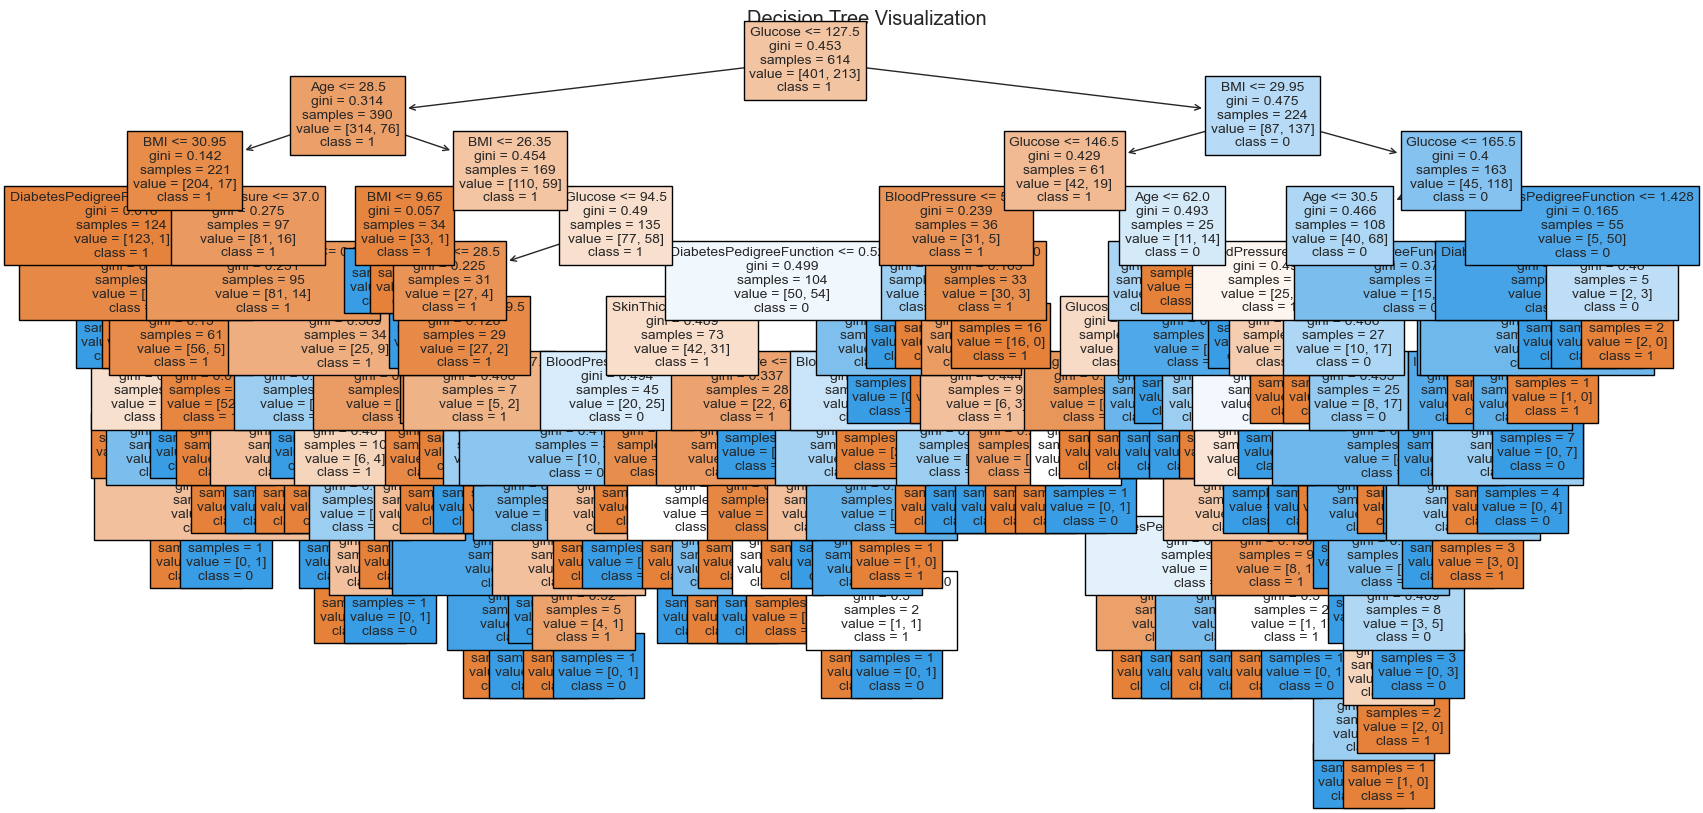

Feature Importances:
                    Feature  Importance
1                   Glucose    0.314225
5                       BMI    0.170700
2             BloodPressure    0.147679
7                       Age    0.099215
6  DiabetesPedigreeFunction    0.083282
4                   Insulin    0.066253
3             SkinThickness    0.061164
0               Pregnancies    0.057482


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns


X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Ensure feature names are strings
feature_names = X.columns.tolist()

# Ensure class names are strings
class_names = y.astype(str).unique().tolist()

# Train the Decision Tree model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

# Feature importances
importances = dt.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [83]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load new data (replace 'new_data.csv' with your new data file)
new_data = pd.read_csv('diabetes.csv')
X_new = new_data.drop('Outcome', axis=1)
y_new = new_data['Outcome']

# Make predictions with the trained model
y_pred_new = dt.predict(X_new)

# Evaluate performance on new data
accuracy_new = accuracy_score(y_new, y_pred_new)
precision_new = precision_score(y_new, y_pred_new, average='weighted')
recall_new = recall_score(y_new, y_pred_new, average='weighted')
f1_new = f1_score(y_new, y_pred_new, average='weighted')

print("Performance on new data:")
print(f"Accuracy: {accuracy_new:.4f}")
print(f"Precision: {precision_new:.4f}")
print(f"Recall: {recall_new:.4f}")
print(f"F1 Score: {f1_new:.4f}")


Performance on new data:
Accuracy: 0.9492
Precision: 0.9499
Recall: 0.9492
F1 Score: 0.9494


In [85]:
import numpy as np

# Create a function to test how small changes in input features affect predictions
def sensitivity_analysis(model, X, y, feature_names, delta=0.01):
    sensitivity_results = {}
    for feature in feature_names:
        original = X[feature].values
        perturbed = original + np.random.normal(0, delta, size=len(original))
        X_perturbed = X.copy()
        X_perturbed[feature] = perturbed
        y_pred_original = model.predict(X)
        y_pred_perturbed = model.predict(X_perturbed)
        accuracy_original = accuracy_score(y, y_pred_original)
        accuracy_perturbed = accuracy_score(y, y_pred_perturbed)
        sensitivity_results[feature] = abs(accuracy_original - accuracy_perturbed)
    return sensitivity_results

# Run sensitivity analysis
sensitivity_results = sensitivity_analysis(dt, X_test, y_test, feature_names)
print("Sensitivity Analysis Results:")
for feature, sensitivity in sensitivity_results.items():
    print(f"{feature}: Sensitivity {sensitivity:.4f}")


Sensitivity Analysis Results:
Pregnancies: Sensitivity 0.0000
Glucose: Sensitivity 0.0000
BloodPressure: Sensitivity 0.0065
SkinThickness: Sensitivity 0.0000
Insulin: Sensitivity 0.0000
BMI: Sensitivity 0.0000
DiabetesPedigreeFunction: Sensitivity 0.0065
Age: Sensitivity 0.0000
